In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score 
import graphviz
from sklearn.model_selection import cross_val_score

In [18]:
data1 = pd.read_excel('data.xlsx',sheet_name = 'Categories')

In [19]:
data1.head(10)

,year,month,LSOA11CD,LSOA11NM,category,total_incidents
0,2019,September-November,E01000001,City of London 001A,C1,8.0
1,2019,September-November,E01000001,City of London 001A,C2,33.0
2,2019,September-November,E01000001,City of London 001A,C3,16.0
3,2019,September-November,E01000001,City of London 001A,C4,2.0
4,2019,September-November,E01000001,City of London 001A,C5,7.0
5,2019,September-November,E01000001,City of London 001A,Total,66.0
6,2019,September-November,E01000002,City of London 001B,C1,12.0
7,2019,September-November,E01000002,City of London 001B,C2,69.0
8,2019,September-November,E01000002,City of London 001B,C3,23.0
9,2019,September-November,E01000002,City of London 001B,C4,3.0


In [20]:
data2 = pd.read_excel('data.xlsx',sheet_name = 'Demographics')

In [21]:
data2.head()

,year,month,LSOA11CD,LSOA11NM,age,sex,category,total_incidents
0,2019,September-November,E01000001,City of London 001A,NaN,U,Total,NaN
1,2019,September-November,E01000001,City of London 001A,NaN,M,Total,2.0
2,2019,September-November,E01000001,City of London 001A,10.0,F,Total,1.0
3,2019,September-November,E01000001,City of London 001A,20.0,F,Total,2.0
4,2019,September-November,E01000001,City of London 001A,20.0,M,Total,1.0


## EDA for data1

In [22]:
len(data1['LSOA11NM'].unique())

5419

In [23]:
data1['District'] = data1['LSOA11NM'].apply(lambda x: x[:-5])

In [24]:
len(data1['District'].unique())

58

In [25]:
data1['District'].unique()

array(['City of London', 'Barking and Dagenham', 'Barnet', 'Bexley',
       'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith and Fulham', 'Haringey',
       'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington and Chelsea', 'Kingston upon Thames', 'Lambeth',
       'Lewisham', 'Merton', 'Newham', 'Redbridge',
       'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets',
       'Waltham Forest', 'Wandsworth', 'Westminster', 'Thurrock',
       'Slough', 'Windsor and Maidenhead', 'Chiltern', 'South Bucks',
       'Brentwood', 'Epping Forest', 'Broxbourne', 'Hertsmere',
       'St Albans', 'Three Rivers', 'Watford', 'Dartford', 'Gravesham',
       'Sevenoaks', 'Elmbridge', 'Epsom and Ewell', 'Guildford',
       'Mole Valley', 'Reigate and Banstead', 'Runnymede', 'Spelthorne',
       'Tandridge', 'Welwyn Hatfield', 'Woking'], dtype=object)

In [26]:
df_district = data1.groupby('District').sum(numeric_only = True)
cols = ['total_incidents']
df_new1 = df_district[cols]
df_new1

,total_incidents
District,
Barking and Dagenham,31841.0
Barnet,50518.0
Bexley,33876.0
Brent,48748.0
Brentwood,0.0
Bromley,42935.0
Broxbourne,0.0
Camden,36837.0
Chiltern,0.0


### Fill Missing value

I find that there are some missing values in 'age' and 'total incidents'.

I fill the missing values in  'age' column with average age.

I fill the  missing values in 'total incidents' column with zero.

In [27]:
data2.isnull().sum()

year                   0
month                  0
LSOA11CD               0
LSOA11NM               0
age                19026
sex                    0
category               0
total_incidents    22756
dtype: int64

In [28]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193582 entries, 0 to 193581
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   year             193582 non-null  int64  
 1   month            193582 non-null  object 
 2   LSOA11CD         193582 non-null  object 
 3   LSOA11NM         193582 non-null  object 
 4   age              174556 non-null  float64
 5   sex              193582 non-null  object 
 6   category         193582 non-null  object 
 7   total_incidents  170826 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 11.8+ MB


In [29]:
data2['total_incidents'] = data2['total_incidents'].fillna(0)
data2['age'] = data2['age'].fillna(data2['age'].mean())

In [30]:
len(data2)

193582

In [31]:
len(data2.LSOA11NM.unique())

5419

In [32]:
# get the number of cities
data2['District'] = data2['LSOA11NM'].apply(lambda x: x[:-5])
data2['District'].unique()

array(['City of London', 'Barking and Dagenham', 'Barnet', 'Bexley',
       'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith and Fulham', 'Haringey',
       'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington and Chelsea', 'Kingston upon Thames', 'Lambeth',
       'Lewisham', 'Merton', 'Newham', 'Redbridge',
       'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets',
       'Waltham Forest', 'Wandsworth', 'Westminster', 'Thurrock',
       'Slough', 'Windsor and Maidenhead', 'Chiltern', 'South Bucks',
       'Brentwood', 'Epping Forest', 'Broxbourne', 'Hertsmere',
       'St Albans', 'Three Rivers', 'Watford', 'Dartford', 'Gravesham',
       'Sevenoaks', 'Elmbridge', 'Epsom and Ewell', 'Guildford',
       'Mole Valley', 'Reigate and Banstead', 'Runnymede', 'Spelthorne',
       'Tandridge', 'Welwyn Hatfield', 'Woking'], dtype=object)

In [33]:
# Calculate number of properties  for each LSOA:
data2.groupby('LSOA11NM').sum()['total_incidents']

<ipython-input-33-b64e38aadbeb>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data2.groupby('LSOA11NM').sum()['total_incidents']


LSOA11NM
Barking and Dagenham 001A      178.0
Barking and Dagenham 001B      241.0
Barking and Dagenham 001C      135.0
Barking and Dagenham 001D      210.0
Barking and Dagenham 002A      135.0
                               ...  
Windsor and Maidenhead 011C      0.0
Windsor and Maidenhead 011D      0.0
Windsor and Maidenhead 016B      0.0
Woking 001A                      0.0
Woking 001E                      0.0
Name: total_incidents, Length: 5419, dtype: float64

# EDA for Categories

In [34]:
data_total = data1[data1['category']=='Total']
data_c1 = data1[data1['category']=='C1 ']
data_c2 = data1[data1['category']=='C2 ']
data_c3 = data1[data1['category']=='C3 ']
data_c4 = data1[data1['category']=='C4 ']
data_c5 = data1[data1['category']=='C5 ']

In [35]:
data_total

,year,month,LSOA11CD,LSOA11NM,category,total_incidents,District
5,2019,September-November,E01000001,City of London 001A,Total,66.0,City of London
12,2019,September-November,E01000002,City of London 001B,Total,122.0,City of London
19,2019,September-November,E01000003,City of London 001C,Total,57.0,City of London
25,2019,September-November,E01000005,City of London 001E,Total,140.0,City of London
31,2019,September-November,E01000006,Barking and Dagenham 016A,Total,48.0,Barking and Dagenham
...,...,...,...,...,...,...,...
64474,2020,September-November,E01033742,Greenwich 007F,Total,62.0,Greenwich
64481,2020,September-November,E01033743,Greenwich 002H,Total,106.0,Greenwich
64486,2020,September-November,E01033744,Greenwich 007G,Total,20.0,Greenwich
64491,2020,September-November,E01033745,Greenwich 002I,Total,32.0,Greenwich


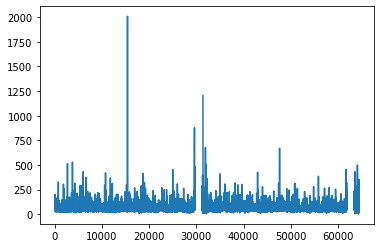

In [36]:
data_total['total_incidents'].plot()
plt.show()

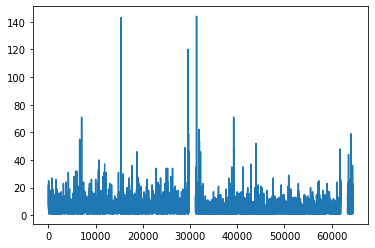

In [37]:
data_c1['total_incidents'].plot()
plt.show()

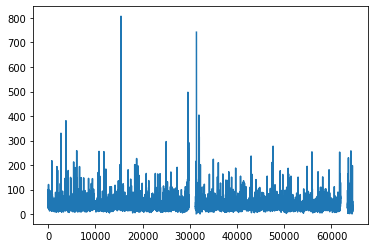

In [38]:
data_c2['total_incidents'].plot()
plt.show()

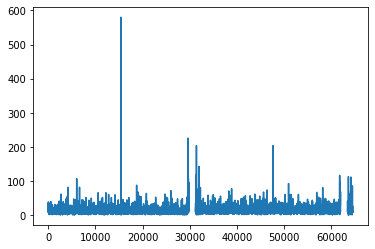

In [39]:
data_c3['total_incidents'].plot()
plt.show()

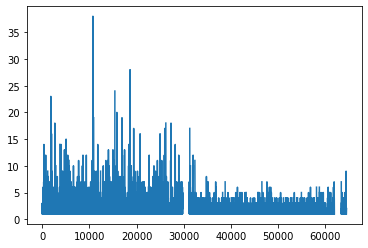

In [40]:
data_c4['total_incidents'].plot()
plt.show()

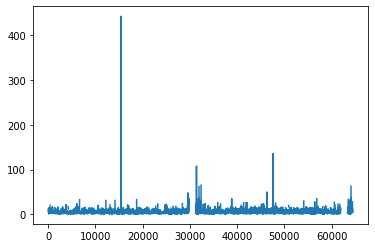

In [41]:
data_c5['total_incidents'].plot()
plt.show()

# EDA for Demographics

In [42]:
data_total = data2[data2['category']=='Total']

In [43]:
data_age = data_total.groupby('age').sum()
data_age.reset_index(inplace = True)
data_age

<ipython-input-43-922b645a5abe>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_age = data_total.groupby('age').sum()


,age,year,total_incidents
0,0.000000,29599320,28530.0
1,10.000000,22382086,16370.0
2,20.000000,35137225,55886.0
3,30.000000,37833268,79555.0
4,40.000000,36827655,70926.0
5,48.680481,38422751,18833.0
6,50.000000,36769081,68530.0
7,60.000000,35979461,63763.0
8,70.000000,35995566,63336.0
9,80.000000,37703984,80486.0


<ipython-input-44-a1a1424682a4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_age["total_incidents"])


<AxesSubplot:xlabel='total_incidents', ylabel='Density'>

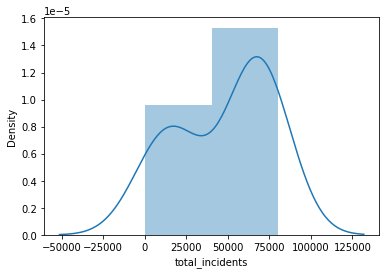

In [44]:
sns.distplot(data_age["total_incidents"])

In [45]:
data_age['age'] = data_age['age'].apply(lambda x:int(x))
cols = ['age','total_incidents']
data_age[cols]

,age,total_incidents
0,0,28530.0
1,10,16370.0
2,20,55886.0
3,30,79555.0
4,40,70926.0
5,48,18833.0
6,50,68530.0
7,60,63763.0
8,70,63336.0
9,80,80486.0


In [70]:
data_age.corr()

,age,year,total_incidents
age,1.000000,-0.458999,-0.121677
year,-0.458999,1.000000,0.792259
total_incidents,-0.121677,0.792259,1.000000


<AxesSubplot:xlabel='age', ylabel='total_incidents'>

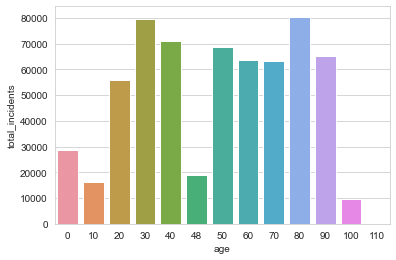

In [68]:
sns.barplot(data=data_age, x="age", y="total_incidents")

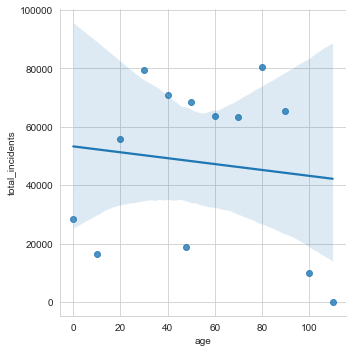

In [47]:
sns.set_style('whitegrid')
sns.lmplot(x ='age', y ='total_incidents', data = data_age)

In [48]:
data_sex = data_total.groupby('sex').sum()
data_sex.reset_index(inplace = True)
data_sex

<ipython-input-48-9feb5b725733>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_sex = data_total.groupby('sex').sum()


,sex,year,age,total_incidents
0,F,180072274,4.421607e+06,315578.0
1,M,177206681,4.168773e+06,291551.0
2,U,33658881,8.332845e+05,14208.0


In [71]:
data_sex.corr()

<ipython-input-71-a5b1cb55dfae>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_sex.corr()


,year,age,total_incidents
year,1.000000,0.998940,0.998506
age,0.998940,1.000000,0.999963
total_incidents,0.998506,0.999963,1.000000


In [49]:
cols = ['sex','total_incidents']
data_sex[cols]

,sex,total_incidents
0,F,315578.0
1,M,291551.0
2,U,14208.0


In [50]:
data_sex['total_incidents'].std()

167491.4491737812

In [51]:
data_sex['total_incidents'].mean()

207112.33333333334

<AxesSubplot:xlabel='sex', ylabel='total_incidents'>

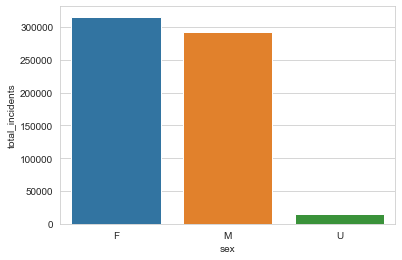

In [52]:
sns.barplot(data=data_sex, x="sex", y="total_incidents")

In [53]:
data_cat = data1.groupby('category').sum()
data_cat.reset_index(inplace = True)
data_cat

<ipython-input-53-fc918e023548>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_cat = data1.groupby('category').sum()


,category,year,total_incidents
0,C1,19132660,49714.0
1,C2,20716042,355897.0
2,C3,20913931,138416.0
3,C4,14192714,13747.0
4,C5,19890089,32729.0
5,O,14021719,18311.0
6,Total,21388534,625471.0


In [54]:
cols = ['category','total_incidents']
df2 = data_cat[cols]
df2

,category,total_incidents
0,C1,49714.0
1,C2,355897.0
2,C3,138416.0
3,C4,13747.0
4,C5,32729.0
5,O,18311.0
6,Total,625471.0


In [55]:
df2['total_incidents'].mean()

176326.42857142858

In [56]:
df2['total_incidents'].std()

232187.24899805698

<AxesSubplot:xlabel='category', ylabel='total_incidents'>

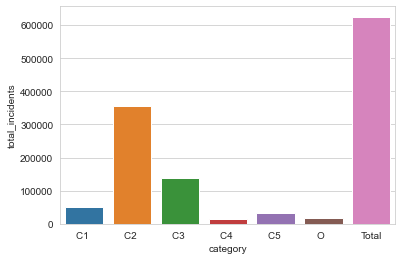

In [57]:
sns.barplot(data=data_cat, x="category", y="total_incidents")

<AxesSubplot:xlabel='category', ylabel='total_incidents'>

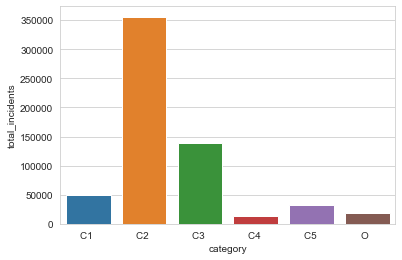

In [58]:
sns.barplot(data=data_cat.iloc[:-1,:], x="category", y="total_incidents")

In [59]:
df_new1 = df_new1.reset_index()
df_new1.head()

,District,total_incidents
0,Barking and Dagenham,31841.0
1,Barnet,50518.0
2,Bexley,33876.0
3,Brent,48748.0
4,Brentwood,0.0


In [60]:
df_new1['total_incidents'].mean()

21280.775862068964

In [61]:
df_new1['total_incidents'].std()

20334.626922362946

In [ ]:
df_new1

<AxesSubplot:xlabel='District', ylabel='total_incidents'>

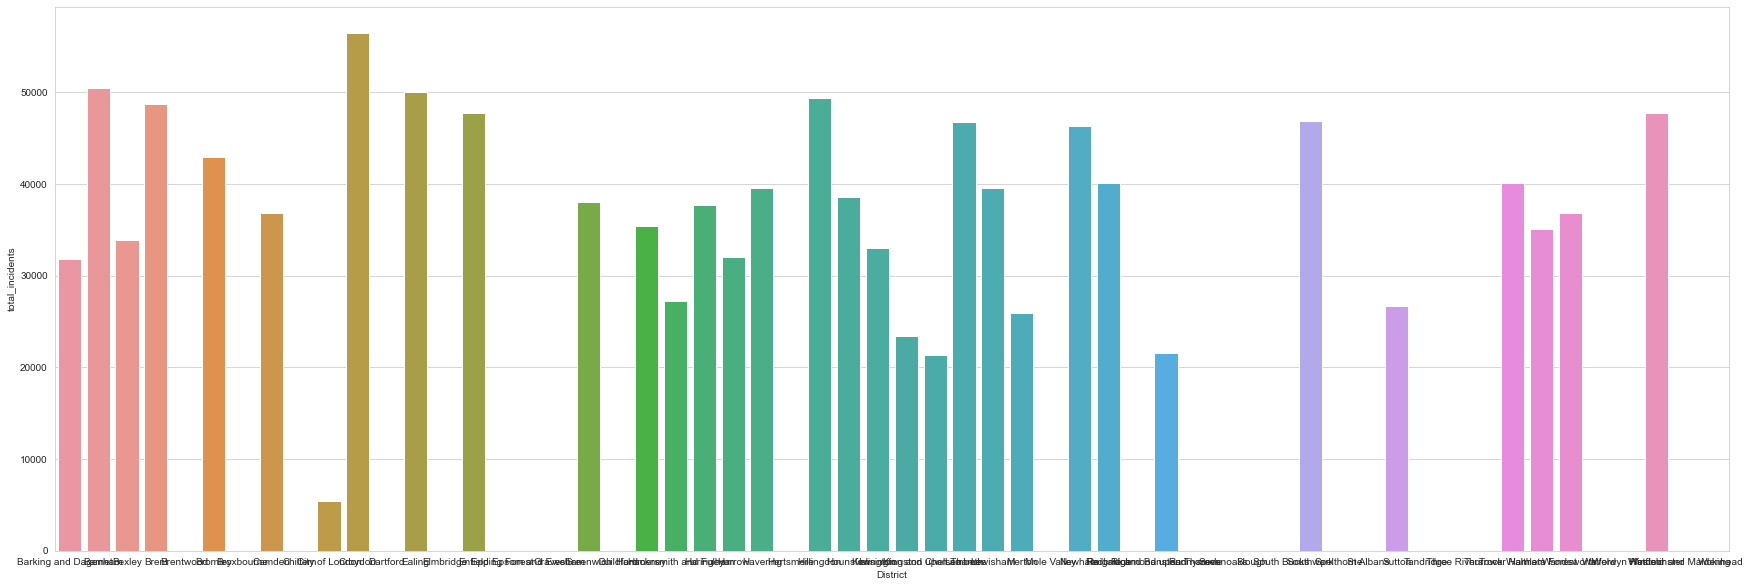

In [75]:
fig = plt.figure(figsize = (30, 10))
sns.barplot(data=df_new1,x = 'District',y = 'total_incidents')

In [63]:
data2.LSOA11CD.value_counts()

E01021443    68
E01000428    66
E01002444    65
E01000600    64
E01032574    63
             ..
E01033612     1
E01023552     1
E01023533     1
E01023526     1
E01033613     1
Name: LSOA11CD, Length: 5419, dtype: int64

In [64]:
data_year = data_total.groupby('year').sum()
data_year.reset_index(inplace = True)
cols  = ['year','total_incidents']
data_year[cols]

<ipython-input-64-a75a6ebc5ff8>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_year = data_total.groupby('year').sum()


,year,total_incidents
0,2019,314379.0
1,2020,306958.0


In [72]:
data_year.corr()

,year,age,total_incidents
year,1.0,-1.0,-1.0
age,-1.0,1.0,1.0
total_incidents,-1.0,1.0,1.0


In [69]:
(314379.0-306958.0)/314379

0.023605266255061565

<AxesSubplot: xlabel='year', ylabel='total_incidents'>

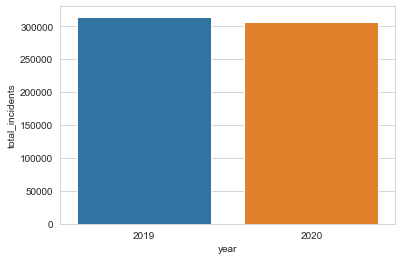

In [76]:
sns.barplot(data=data_year, x="year", y="total_incidents")

In [95]:
data_year['total_incidents'].mean()

310668.5

In [96]:
data_year['total_incidents'].std()

5247.439423185369

## Preprocessing

In [90]:
def LoadData(path,date):
    d1=pd.read_csv(path+date)
    d1.loc[:,"SUM_Field15"] = d1.loc[:,"SUM_Field15"].fillna(d1.loc[:,"SUM_Field15"].median())
    d1.loc[:,"c1"] = d1.loc[:,"c1"].fillna(0)
    d1.loc[:,"c2"] = d1.loc[:,"c2"].fillna(0)
    d1.loc[:,"c3"] = d1.loc[:,"c3"].fillna(0)
    d1.loc[:,"c4"] = d1.loc[:,"c4"].fillna(0)
    d1.loc[:,"c5"] = d1.loc[:,"c5"].fillna(0)
    d1.loc[:,"c0"] = d1.loc[:,"c0"].fillna(0)
    #d1.loc[:,"agenull"] = d1.loc[:,"agenull"].fillna(0)
    #d1.loc[:,"age10"] = d1.loc[:,"age10"].fillna(0)
    #d1.loc[:,"age20"] = d1.loc[:,"age20"].fillna(0)
    #d1.loc[:,"age30"] = d1.loc[:,"age30"].fillna(0)
    #d1.loc[:,"age40"] = d1.loc[:,"age40"].fillna(0)
    #d1.loc[:,"age50"] = d1.loc[:,"age50"].fillna(0)
    #d1.loc[:,"age60"] = d1.loc[:,"age60"].fillna(0)
    #d1.loc[:,"age70"] = d1.loc[:,"age70"].fillna(0)
    #d1.loc[:,"age80"] = d1.loc[:,"age80"].fillna(0)
    #d1.loc[:,"age90"] = d1.loc[:,"age90"].fillna(0)
    #d1.loc[:,"age100"] = d1.loc[:,"age100"].fillna(0)
    d1.loc[:,"total_incidents"] = d1.loc[:,"total_incidents"].fillna(d1.loc[:,"total_incidents"].median())
    d1.loc[:,"PNT_COUNT"] = d1.loc[:,"PNT_COUNT"].fillna(d1.loc[:,"PNT_COUNT"].median())
    d1.loc[:,"PERCENTAGE"] = d1.loc[:,"PERCENTAGE"].fillna(d1.loc[:,"PERCENTAGE"].median())
    d1.loc[:,"FREQUENCY"] = d1.loc[:,"FREQUENCY"].fillna(d1.loc[:,"FREQUENCY"].median())
    x_data=d1.iloc[:,1:-1]
    y_data=d1.iloc[:,-1]
    return x_data,y_data

In [92]:
PATH="./"
X_DATA,Y_DATA= LoadData(PATH,"categoryall.csv")
X_DATA.head()

,LS0A11CD,LS0A11NM,c1,c2,c3,c4,c5,c0,male,female,unknowsex,avgage,PNT_COUNT,PERCENTAGE,FREQUENCY,SUM_Field15
0,E01000001,City of London 001A,8.0,33,16.0,2.0,7.0,0.0,37,29,0,49,3.0,0.002552,4.0,18.0
1,E01000002,City of London 001B,12.0,69,23.0,3.0,0.0,1.0,67,53,2,46,3.0,0.002552,4.0,18.0
2,E01000003,City of London 001C,9.0,27,8.0,1.0,6.0,6.0,27,26,1,67,3.0,0.002552,4.0,18.0
3,E01000005,City of London 001E,22.0,81,23.0,2.0,12.0,0.0,65,72,3,39,3.0,0.002552,4.0,18.0
4,E01000006,Barking and Dagenham 016A,8.0,23,10.0,0.0,1.0,0.0,20,24,1,34,7.0,0.005956,3.0,11.0


In [93]:
Y_DATA.head()

0     66.0
1    122.0
2     57.0
3    140.0
4     48.0
Name: total_incidents, dtype: float64

In [99]:
X = X_DATA.iloc[:,1:2]
enc = OneHotEncoder(categories='auto').fit(X)
result = enc.transform(X).toarray()


newdata = pd.concat([X_DATA,pd.DataFrame(result)],axis=1)
newdata.drop(["LS0A11NM"],axis=1,inplace=True)